In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("../Ads_CTR_Optimisation.csv")

In [3]:
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.shape

(10000, 10)

In [5]:
# Implementing Random Selection
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [7]:
total_reward

1238

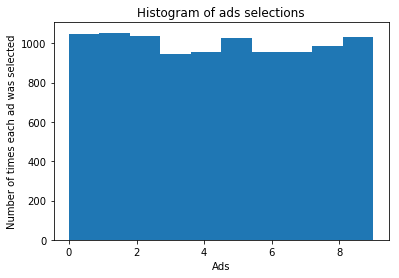

In [6]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [8]:
# here we implemented a random selection model that takes ads at random
# this random selection algo got a total reward of 1238
# we will impement other algos to improve this score
# as we are selecting in random the visualisation would be uniform 

In [9]:
# impelementing UCB

In [53]:
import math
N = 10000
d = 10
number_of_selections = [0] * d
sums_of_rewards = [0] * d
ads_selected = []
total_reward = 0
for n in range(0,N):
    max_upper_bound = 0
    ad = 0
    for i in range(0,d):
        if number_of_selections[i]>0:
            average_reward = sums_of_rewards[i]/number_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n + 1)/number_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400 # 10 ** 400
        
        if upper_bound>max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
        
    ads_selected.append(ad)
    number_of_selections[ad]+=1
    reward = dataset.values[n,ad]
    sums_of_rewards[ad] += reward
    total_reward += reward
# in the first 10 we set the ad i itself
# then the strategy starts

In [54]:
total_reward

2178

In [14]:
ads_selected[:50]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 8,
 9,
 0,
 8,
 1,
 2,
 3,
 4,
 5,
 6,
 6,
 7,
 7,
 7,
 9,
 7,
 0,
 6,
 8,
 1]

In [16]:
ads_selected[-50:]

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [17]:
# thus the algorithm selects 5th ad(index 4) as the best ad

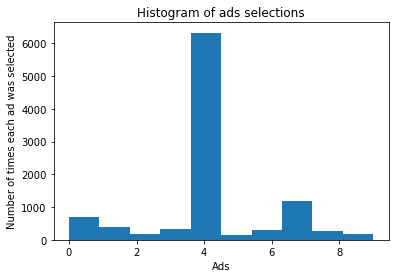

In [21]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")